In [1]:
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [2]:
import pandas as pd
df = pd.DataFrame(iris.data, columns = iris.feature_names)
sy = pd.Series(iris.target, dtype='category')
sy = sy.cat.rename_categories(iris.target_names)
df['species'] = sy
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


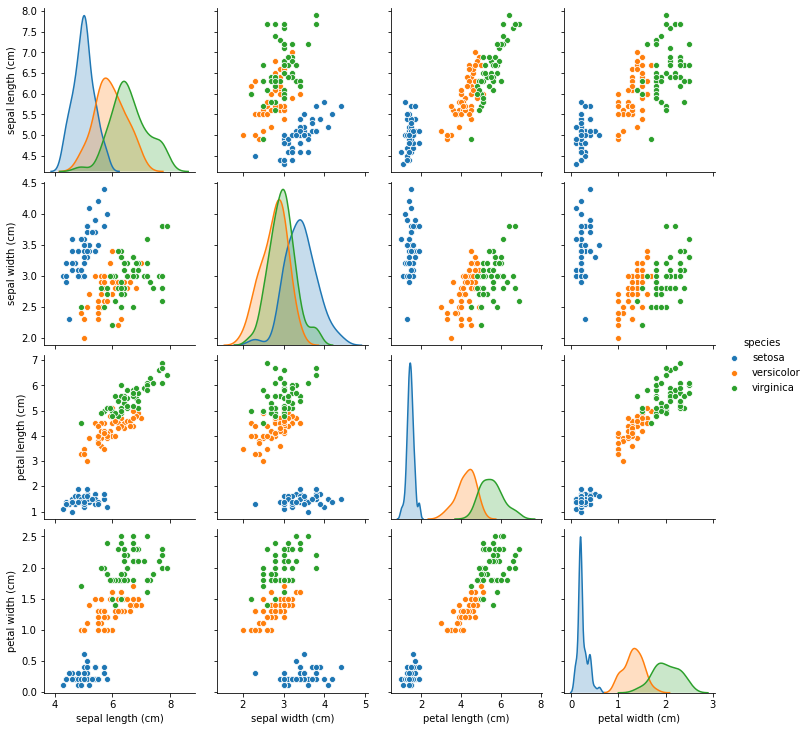

In [3]:
# import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, hue='species')
plt.show()

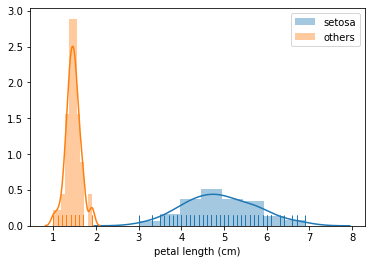

In [4]:
sns.distplot(df[df.species != "setosa"]["petal length (cm)"],
             hist=True, rug=True, label="setosa")
sns.distplot(df[df.species == "setosa"]["petal length (cm)"],
             hist=True, rug=True, label="others")
plt.legend()
plt.show()

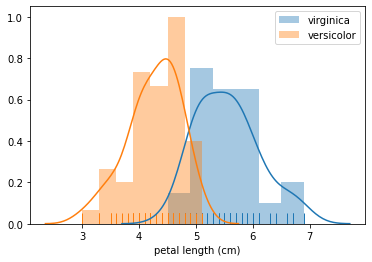

In [5]:
sns.distplot(df[df.species == "virginica"]["petal length (cm)"],
             hist=True, rug=True, label="virginica")
sns.distplot(df[df.species == "versicolor"]["petal length (cm)"],
             hist=True, rug=True, label="versicolor")
plt.legend()
plt.show()

In [6]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [7]:
df_temp = df[df['petal length (cm)'] > 2.1]

result_ls = []

n = 4

for p in range(25):
    num = n + p * 0.1
    df_temp['predict'] = ''
    df_temp['predict'][df_temp['petal length (cm)'] > num] = 'virginica'
    df_temp['predict'][df_temp['petal length (cm)'] <= num] = 'versicolor'
    ls = []
    
    for i in range(50,150):
        if df_temp['species'][i] == df_temp['predict'][i]:
            ls.append(1)
        else:
            ls.append(0)
            
        result_ls.append(0)
        
    result_ls.append({
        'point' : round(num,2),
        'True' : sum(ls)})
    
result_df = pd.DataFrame(result_ls)

C:\Users\82109\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\82109\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\82109\anaconda3\lib\site-packages\pandas\core\generic.py:8765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ind

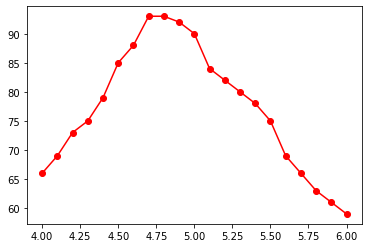

In [9]:
import numpy as np
df['species2'] = df['species'] == 'versicolor'

thresholds = np.linspace(4,6,21)
list_accuracy = []

for t in thresholds:
    df['predict'] = df['petal length (cm)'] <= t
    
    accuracy = (df.predict == df.species2).sum()
    list_accuracy.append(accuracy)
    
plt.plot(thresholds, list_accuracy, 'ro-')

In [10]:
from sklearn.datasets import load_wine
wine = load_wine()
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [11]:
df = pd.DataFrame(wine.data, columns=wine.feature_names)
sy = pd.Series(wine.target, dtype="category")
sy = sy.cat.rename_categories(wine.target_names)
df['class'] = sy
df.tail()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740.0,class_2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750.0,class_2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835.0,class_2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840.0,class_2
177,14.13,4.10,2.74,24.5,96.0,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560.0,class_2


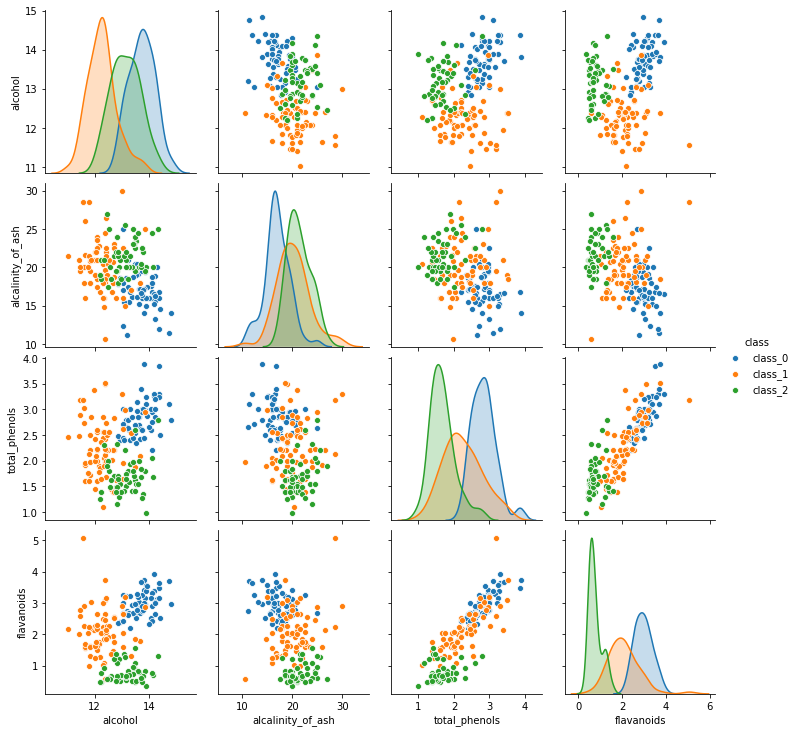

In [12]:
sns.pairplot(vars=["alcohol", "alcalinity_of_ash", "total_phenols", "flavanoids"], 
             hue="class", data=df)
plt.show()

#### 연습문제 4. flavanoids

In [13]:
from sklearn.datasets import fetch_rcv1

rcv = fetch_rcv1()
print(rcv.DESCR)

.. _rcv1_dataset:

RCV1 dataset
------------

Reuters Corpus Volume I (RCV1) is an archive of over 800,000 manually 
categorized newswire stories made available by Reuters, Ltd. for research 
purposes. The dataset is extensively described in [1]_.

**Data Set Characteristics:**

    ==============     =====================
    Classes                              103
    Samples total                     804414
    Dimensionality                     47236
    Features           real, between 0 and 1
    ==============     =====================

:func:`sklearn.datasets.fetch_rcv1` will load the following 
version: RCV1-v2, vectors, full sets, topics multilabels::

    >>> from sklearn.datasets import fetch_rcv1
    >>> rcv1 = fetch_rcv1()

It returns a dictionary-like object, with the following attributes:

``data``:
The feature matrix is a scipy CSR sparse matrix, with 804414 samples and
47236 features. Non-zero values contains cosine-normalized, log TF-IDF vectors.
A nearly chronologi